In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

# Load Dataset

In [4]:
X_train =  np.loadtxt('input.csv', delimiter = ',')
Y_train =  np.loadtxt('labels.csv', delimiter = ',')

x_test =  np.loadtxt('input_test.csv', delimiter = ',')
Y_test =  np.loadtxt('labels_test.csv', delimiter = ',')

In [5]:
X_train =  X_train.reshape(len(X_train), 100, 100,3)
Y_train =  Y_train.reshape(len(Y_train), 1)

x_test =  x_test.reshape(len(x_test), 100, 100,3)
Y_test =  Y_test.reshape(len(Y_test), 1)
X_train = X_train/255.0
x_test = x_test/255.0

In [6]:
print("Shapes of X_train:", X_train.shape)
print("Shapes of Y_train:", Y_train.shape)
print("Shapes of x_test:", x_test.shape)
print("Shapes of Y_test:", Y_test.shape)

Shapes of X_train: (2000, 100, 100, 3)
Shapes of Y_train: (2000, 1)
Shapes of x_test: (400, 100, 100, 3)
Shapes of Y_test: (400, 1)


In [8]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

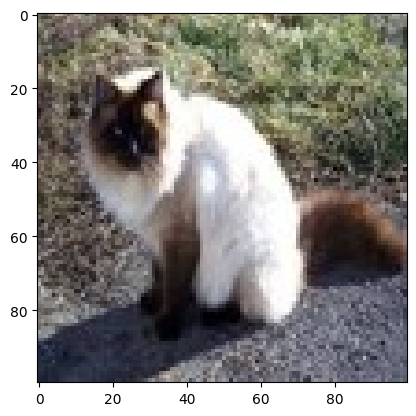

In [7]:
idx = random.randint(100, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [10]:
model = Sequential([ 
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)), 
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [42]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.9944 - loss: 0.0382
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.9984 - loss: 0.0275
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.9983 - loss: 0.0245
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9992 - loss: 0.0152
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 1.0000 - loss: 0.0101


In [43]:
model.evaluate(X_train, Y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 1.0000 - loss: 0.0070


[0.008547745645046234, 1.0]

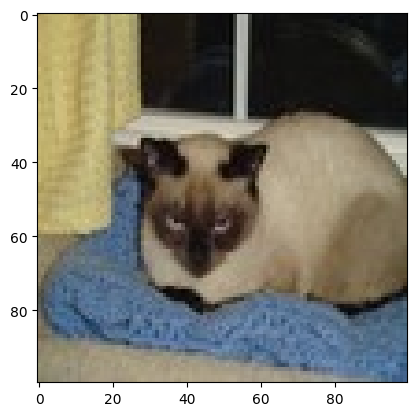

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
It is a cat


In [48]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("It is a",pred)